# Phishing Website Detection
*group project by Melon_IT*

## Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, auc, recall_score, precision_score, classification_report, confusion_matrix, average_precision_score

## Dataset
source https://www.unb.ca/cic/datasets/url-2016.html

In [31]:
df = pd.read_csv('urls.csv')
df

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,wvk12-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1
9996,adplife.com,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0,1
9997,kurortnoye.com.ua,0,1,1,3,0,0,1,0,0,0,1,1,1,0,1,0,1
9998,norcaltc-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1


<Axes: >

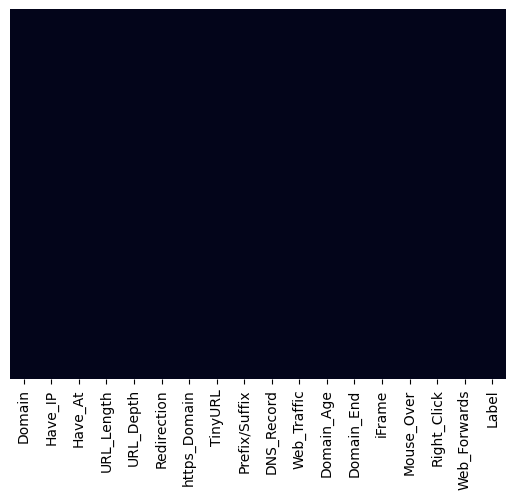

In [33]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False) #is ok with data

In [34]:
x = df.drop(['Label'] , axis = 1)
x = x.drop(['Domain'] , axis = 1)
y = df['Label']

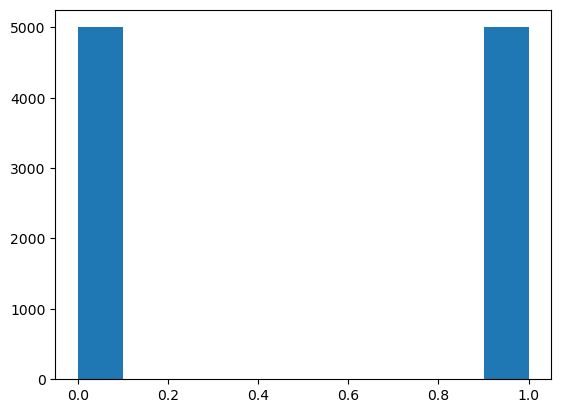

In [35]:
y_his = y.to_numpy()
plt.hist(y)
plt.show() #classes are balanced

# Machine Learning Models & Training
* LogisticRegression
* XGBoost
* GBoost

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### LogisticRegression

In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)

D:\conda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
prec_LG = precision_score(y_test, y_pred)
acc_LG = accuracy_score(y_test, y_pred)
recall_LG = recall_score(y_test, y_pred)
confusion_LG = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion.ravel()
specificity_LG = tn / (tn + fp)

print("Accuracy", acc_LG, "\nPrecision: ",prec_LG, "\nRecall: ", recall_LG,"\nSpecificity", specificity_LG)

Accuracy 0.799 
Precision:  0.9286713286713286 
Recall:  0.6541871921182266 
Specificity 0.9685966633954858


### XGBoost

In [40]:
# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
y_pred = xgb.predict(X_test)

In [42]:
prec_XGB = precision_score(y_test, y_pred)
acc_XGB = accuracy_score(y_test, y_pred)
recall_XGB = recall_score(y_test, y_pred)
confusion_XGB = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion.ravel()
specificity_XGB = tn / (tn + fp)

print("Accuracy", acc_XGB, "\nPrecision: ",prec_XGB, "\nRecall: ", recall_XGB,"\nSpecificity", specificity_XGB)

Accuracy 0.85 
Precision:  0.9181286549707602 
Recall:  0.7733990147783252 
Specificity 0.9685966633954858


### GBoost

In [45]:
model = GradientBoostingClassifier(n_estimators=50, max_depth=7, random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


prec_GB = precision_score(y_test, y_pred)
acc_GB = accuracy_score(y_test, y_pred)
recall_GB = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion.ravel()
specificity_GB = tn / (tn + fp)

print("Accuracy", acc_GB, "\nPrecision: ",prec_GB, "\nRecall: ", recall_GB,"\nSpecificity", specificity_GB)

Accuracy 0.8475 
Precision:  0.9539641943734015 
Recall:  0.734975369458128 
Specificity 0.9634517766497462


Text(0.5, 1.0, 'Важность признаков')

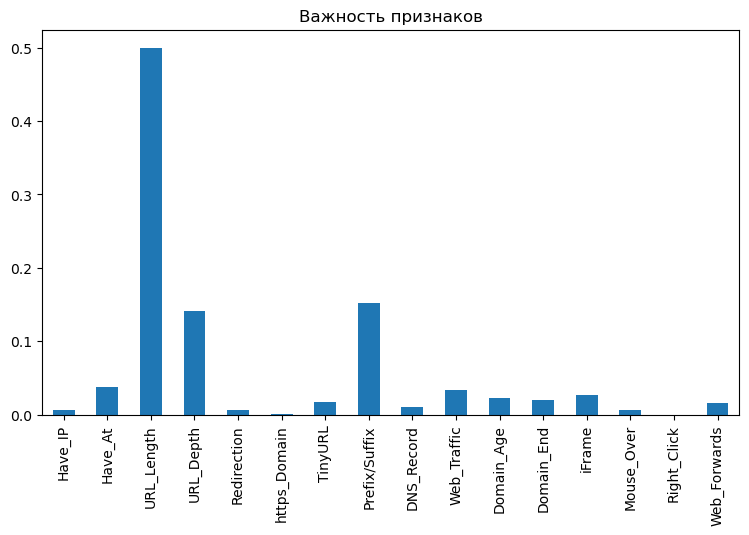

In [46]:
imp = model.feature_importances_
viz_imp = pd.Series(imp, X_train.columns)
fig, ax = plt.subplots(figsize=(9,5))
viz_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")